In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import r2_score
import numpy as np

# Daten aus einer CSV-Datei laden
file_path = 'Schnittflaechendaten.csv'
data = pd.read_csv(file_path)

# Die ersten fünf und die elfte Spalte aus den Daten entfernen
data = data.drop(data.columns[[0, 1, 2, 3, 4, 11]], axis=1)

# Die Daten in Merkmale (X) und Zielwerte (y) aufteilen
X = data.iloc[:, :6]  # Die ersten 6 Spalten als Merkmale
y = data.iloc[:, 6:]  # Die restlichen Spalten als Zielwerte

# Den Maximalwert für jede Spalte in X bestimmen
max_values = X.max()

# Jede Spalte von X mit ihrem Maximalwert normalisieren
X = X.apply(lambda x: x / x.max(), axis=0)

# Die Daten in Trainings- und Testdatensätze mit einem Verhältnis von 80:20 aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Modell definieren
# Das Modell besteht aus mehreren Schichten (Layers), darunter Eingabeschicht, versteckte Schichten und Ausgabeschicht
model = Sequential([
    Input(shape=(6,)),  # Eingabeschicht mit 6 Eingabe-Features
    Dense(40, activation='relu'),  # Erste versteckte Schicht mit 40 Neuronen und ReLU-Aktivierungsfunktion
    Dense(50, activation='relu'),  # Zweite versteckte Schicht mit 50 Neuronen und ReLU-Aktivierungsfunktion
    Dense(50, activation='relu'),  # Dritte versteckte Schicht mit 50 Neuronen und ReLU-Aktivierungsfunktion
    Dense(45, activation='relu'),  # Vierte versteckte Schicht mit 45 Neuronen und ReLU-Aktivierungsfunktion
    Dense(4, activation='linear')  # Ausgabeschicht mit 4 Neuronen und linearer Aktivierungsfunktion
])

# Modell kompilieren
# Verlustfunktion: Mean Squared Error (MSE)
# Optimierungsalgorithmus: Adam
# Metrik: Mean Absolute Error (MAE)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Anlernprozess mittels History-Moduls aufzeichnen
history = tf.keras.callbacks.History()

# Modell trainieren
# Trainingsdaten: X_train und y_train
# Validierungsdaten: X_test und y_test
# Epochen: 150
# Batch-Größe: 4
# Callback: History-Modul zur Aufzeichnung des Trainingsverlaufs
history = model.fit(X_train, y_train, epochs=150, batch_size=4, validation_data=(X_test, y_test), callbacks=[history])

# Modell auf dem Testdatensatz evaluieren
# Verlust (Loss) und mittlerer absoluter Fehler (MAE) werden berechnet
loss, mae = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test MAE: {mae}')


Epoch 1/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 689.9717 - mae: 17.9679 - val_loss: 125.7995 - val_mae: 8.0759
Epoch 2/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 123.4687 - mae: 7.9650 - val_loss: 128.1871 - val_mae: 8.2250
Epoch 3/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 123.4778 - mae: 7.9983 - val_loss: 120.9603 - val_mae: 7.9746
Epoch 4/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 121.3668 - mae: 7.9655 - val_loss: 112.2118 - val_mae: 7.6948
Epoch 5/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 102.7025 - mae: 7.3466 - val_loss: 57.0307 - val_mae: 5.3846
Epoch 6/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 46.9514 - mae: 4.8772 - val_loss: 38.6291 - val_mae: 4.4907
Epoch 7/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38.7701 - mae: 4.4314 - val_loss: 39.1333 - val_mae: 4.4658
Epoch 8/150
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37.1650 - mae: 4.4141 - val_loss: 34.3329 - val_mae: 4.2011
Epoch 9/150
205/205 ━━

In [ ]:
# Speichern des trainierten Modells
# Das Modell wird in einer Datei mit dem Namen 'model2.keras' gespeichert.
# Dies ermöglicht es, das Modell später wieder zu laden und erneut zu verwenden, ohne es erneut trainieren zu müssen.
model.save('model2.keras')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
R-squared uniform average (Default-Variante): 0.8387027730194662
R-squared raw values (Jede Säule der Matrix einzeln): [0.98098096 0.96179458 0.97268684 0.43934872]
Mittelwert der raw Werte: 0.8387027730194662
R-squared variance weighted (gewichteter Mittelwert je stärker Varianz desto stärkere Gewichtung): 0.9656795688244859
R-squared flatten: 0.9924337982542734
R-squared Funktion AS: 0.9924337982542734


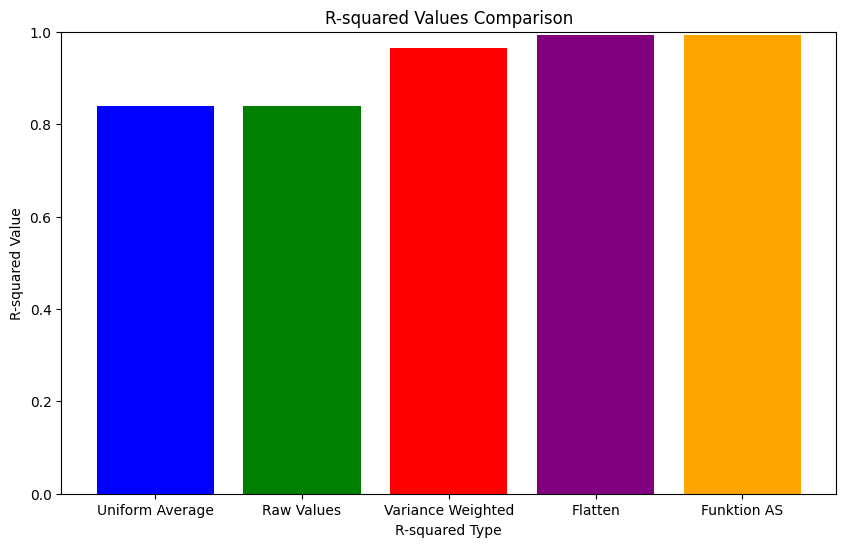

In [ ]:
# Das trainierte Modell aus der Datei "model2.keras" laden
model = tf.keras.models.load_model("model2.keras")

# Vorhersagen auf dem Testdatensatz durchführen
y_pred = model.predict(X_test)


# Flatten
# R²-Wert berechnen, indem die Werte in eine eindimensionale Struktur umgewandelt werden
r2_flatten = r2_score(y_test.values.flatten(), y_pred.flatten())

# R²-Werte berechnen
# Standard-R²-Wert (Durchschnitt über alle Zielvariablen)
r2_std = r2_score(y_test.values, y_pred, multioutput="uniform_average")

# R²-Wert für jede Zielvariable einzeln berechnen
r2_raw = r2_score(y_test.values, y_pred, multioutput='raw_values')

# Varianz-gewichteter R²-Wert (Zielvariablen mit höherer Varianz werden stärker gewichtet)
r2_var = r2_score(y_test.values, y_pred, multioutput="variance_weighted")

# Ergebnisse der R²-Berechnungen ausgeben
print(f'R-squared uniform average (Default-Variante): {r2_std}')
print(f'R-squared raw values (Jede Säule der Matrix einzeln): {r2_raw}')
print(f'Mittelwert der raw Werte: {r2_raw.mean()}')
print(f'R-squared variance weighted (gewichteter Mittelwert je stärker Varianz desto stärkere Gewichtung): {r2_var}')
print(f'R-squared flatten: {r2_flatten}')

# Matplotlib für die Visualisierung importieren
import matplotlib.pyplot as plt

# R²-Werte in einem Dictionary speichern
r2_values = {
    'Uniform Average': r2_std,
    'Variance Weighted': r2_var,
    'Flatten': r2_flatten,
}

# Balkendiagramm erstellen, um die R²-Werte zu vergleichen
plt.figure(figsize=(10, 6))
plt.bar(r2_values.keys(), r2_values.values(), color=['blue', 'red', 'purple'])
plt.xlabel('R-squared Type')  # Beschriftung der x-Achse
plt.ylabel('R-squared Value')  # Beschriftung der y-Achse
plt.title('R-squared Values Comparison')  # Titel des Diagramms
plt.ylim(0, 1)  # Begrenzung der y-Achse auf den Bereich 0 bis 1
plt.show()  # Diagramm anzeigen